In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [19]:
IMAGE_SIZE = [224, 224]

epochs = 8
batch_size = 32

train_path = '../Data/image_sentiment/Training'
valid_path = '../Data/image_sentiment/Test'

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

folders = glob(train_path + '/*')

array([[[167, 172, 178],
        [167, 172, 178],
        [167, 172, 176],
        ...,
        [ 63,  72,  81],
        [ 88,  97, 106],
        [120, 129, 136]],

       [[169, 174, 178],
        [168, 173, 177],
        [169, 172, 177],
        ...,
        [ 68,  75,  81],
        [ 96, 103, 109],
        [117, 124, 130]],

       [[173, 176, 181],
        [172, 175, 180],
        [171, 174, 179],
        ...,
        [ 78,  83,  86],
        [109, 114, 117],
        [112, 117, 120]],

       ...,

       [[183, 171, 173],
        [180, 174, 174],
        [177, 178, 173],
        ...,
        [207, 196, 192],
        [206, 195, 191],
        [202, 191, 187]],

       [[182, 170, 172],
        [180, 174, 174],
        [178, 178, 176],
        ...,
        [208, 194, 191],
        [207, 193, 190],
        [205, 191, 188]],

       [[184, 172, 174],
        [182, 176, 176],
        [179, 179, 177],
        ...,
        [205, 194, 190],
        [206, 195, 191],
        [206, 195, 191]]

In [12]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in res.layers:
  layer.trainable = False

x = Flatten()(res.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Found 1127 images belonging to 5 classes.
{'Highly negative': 0, 'Highly positive': 1, 'negative': 2, 'neutral': 3, 'positive': 4}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.50216 max: 149.59271


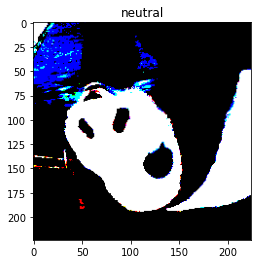

Found 4829 images belonging to 5 classes.
Found 1127 images belonging to 5 classes.
Epoch 1/8
150/150 [==============================] - 654s 4s/step - loss: 30.3184 - accuracy: 0.3517 - val_loss: 28.4610 - val_accuracy: 0.3098
Epoch 2/8
150/150 [==============================] - 656s 4s/step - loss: 20.2646 - accuracy: 0.4205 - val_loss: 19.5023 - val_accuracy: 0.3848
Epoch 3/8
150/150 [==============================] - 678s 5s/step - loss: 18.5818 - accuracy: 0.4685 - val_loss: 19.6513 - val_accuracy: 0.3964
Epoch 4/8
150/150 [==============================] - 691s 5s/step - loss: 17.2468 - accuracy: 0.4958 - val_loss: 22.7702 - val_accuracy: 0.3545
Epoch 5/8
150/150 [==============================] - 675s 4s/step - loss: 17.2664 - accuracy: 0.5018 - val_loss: 27.4674 - val_accuracy: 0.3393
Epoch 6/8
150/150 [==============================] - 667s 4s/step - loss: 16.9333 - accuracy: 0.5192 - val_loss: 29.8624 - val_accuracy: 0.3027
Epoch 7/8
150/150 [==============================] -

In [13]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)
